### Task 1: Introduction to Isolation Forest
**Description**: Install the necessary library and load a sample dataset.

**Steps**:
1. Install scikit-learn
2. Load a sample dataset using Python

In [1]:
#
import subprocess
import sys

# Step 1: Install scikit-learn if not installed
try:
    import sklearn
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])

# Step 2: Load a sample dataset
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset for demonstration
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Display first few rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### Task 2: Building an Isolation Forest
**Description**: Initialize an Isolation Forest model and fit it to the Boston dataset.

**Steps**:
1. Initialize Isolation Forest
2. Fit model

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import IsolationForest
import pandas as pd


california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)

# Initialize Isolation Forest
model = IsolationForest(random_state=42)

# Fit model
model.fit(X)

IsolationForest(random_state=42)

### Task 3: Detecting Anomalies
**Description**: Use the fitted Isolation Forest model to predict anomalies.

**Steps**:
1. Predict anomalies
2. Display anomaly counts

In [3]:

predictions = model.predict(X)

# Count anomalies and normal points
import numpy as np
unique, counts = np.unique(predictions, return_counts=True)
anomaly_counts = dict(zip(unique, counts))

print("Anomaly counts:", anomaly_counts)

Anomaly counts: {-1: 1412, 1: 19228}


### Task 4: Visualizing Anomalies
**Description**: Visualize the results to see which samples are considered anomalies.

**Steps**:
1. Plot a scatter plot

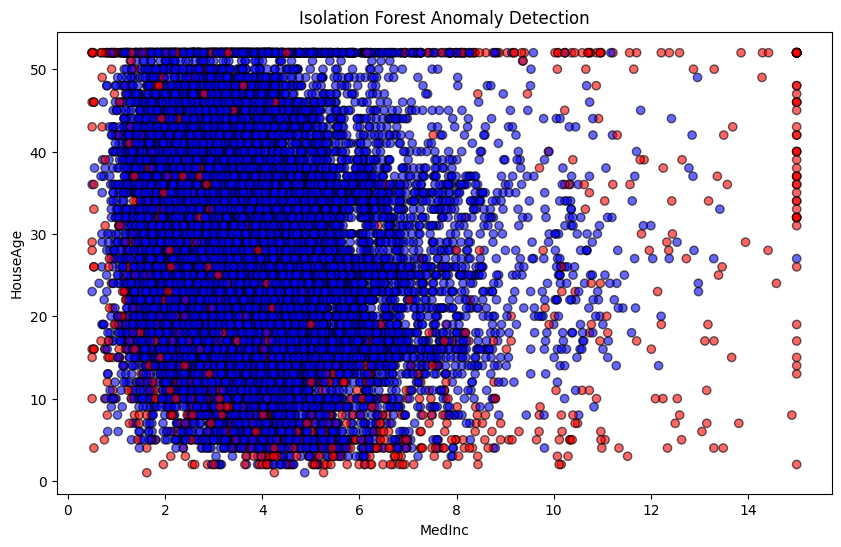

In [4]:


import matplotlib.pyplot as plt


x_feature = "MedInc"
y_feature = "HouseAge"

# Create a color map: red for anomalies, blue for normal
colors = ['red' if pred == -1 else 'blue' for pred in predictions]

plt.figure(figsize=(10, 6))
plt.scatter(X[x_feature], X[y_feature], c=colors, alpha=0.6, edgecolor='k')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Isolation Forest Anomaly Detection")
plt.show()

### Task 5: Interpret Contamination Parameter
**Description**: Experiment with different contamination levels.

In [5]:

for contamination in [0.01, 0.05, 0.1, 0.2]:
    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(X)
    preds = model.predict(X)
    unique, counts = np.unique(preds, return_counts=True)
    counts_dict = dict(zip(unique, counts))
    print(f"Contamination={contamination}: Anomaly counts={counts_dict}")

Contamination=0.01: Anomaly counts={-1: 207, 1: 20433}
Contamination=0.05: Anomaly counts={-1: 1032, 1: 19608}
Contamination=0.1: Anomaly counts={-1: 2064, 1: 18576}
Contamination=0.2: Anomaly counts={-1: 4128, 1: 16512}
